# Project Overview:( Hasitha Gajjala and Manojith Saha Sardar)
Sentiment Analysis Dashboard:
Working as part of a huge IT Infrastructure Team for a retail giants in US, we realize the imperative significance of customer feedback data analysis. Handled adeptly, these will not only prove to be a KPI but also the paradigm nurtured will go a long way to improve the decision making process to improve business footprint. Gazing at it from the other side of the table, an end user will always like to have a comprehensive, crisp feedback summary which will aid to their judgment when choosing a particular product/ service(s). That’s exactly where we intend to put forward a cutting edge tool to present the knowledge block.
There have been multiple attempts to materialize the exact requirement and there are already few popular web addresses to look forward to but are they crisp enough. While performing a controlled review we noticed that a web user still has to spend a lot of time to go over the text data to attain an understanding to a point where he/ she feels confident enough. We aim to simplify this process by building a dashborad of positive and negative reviews so user can see quickly look and make a decision.
We are really excited to venture into a project in putting together sentiment analysis of amazon appliance product reviews 
A rough outline of how we built the model is as follows:
1. Select a group of 8-10 product/service feedback corpus data.
2. Perform data cleansing to get rid of inconsistent or confusing sentiments.
3. Build a text analytics classifier using different models.
4. Compare and contract and pick the best classifier.
5. A visualization dashboard that enables users to quickly compare reviews across different products and make decisions.

# Installation instructions:
1. Python 3.6
2. Jupyter notebook
3. Install scikit-learn
4. Install pandas
5. Install numpy
6. Install matplotlib
Standard Python libraries are imported but specifically used pandas for data manipulation and analysis and numpy to support multi dimensional computation.

In [1]:
import pandas as pd # Make sure to install pandas
import numpy as np # Make sure ti install numpy
import wordcloud
import matplotlib.pyplot as plt
import nltk

In [2]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

# Data:
1. The code below displays customer review data for appliances on Amazon as tsv. Displayed the first 5 top rows for clarity.
2. The head of the data frame displays cutomer_id, review-id, product_id, product_parent, product_title, product_category, star_rating etc. But, we are only interested in product_id, star_rating and review_body for our semtiment analysis.

In [3]:
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv('C:\\General\\Big Data\\MCS-DS\\CS 410 Text Information Systems\\Final Project\\amazon_reviews_appliances.tsv',sep='\t',)
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,16199106,R203HPW78Z7N4K,B0067WNSZY,633038551,"FGGF3032MW Gallery Series 30"" Wide Freestanding Gas Range 5 Sealed Burners Easy Temperature Probe Express-Select Controls One-Touch Self Clean:",Major Appliances,5,0,0,N,Y,"If you need a new stove, this is a winner.",What a great stove. What a wonderful replacement for my sort of antique. Enjoy it every day.,2015-08-31
1,US,16374060,R2EAIGVLEALSP3,B002QSXK60,811766671,Best Hand Clothes Wringer,Major Appliances,5,1,1,N,Y,Five Stars,worked great,2015-08-31
2,US,15322085,R1K1CD73HHLILA,B00EC452R6,345562728,Supco SET184 Thermal Cutoff Kit,Major Appliances,5,0,0,N,Y,Fast Shipping,Part exactly what I needed. Saved by purchasing myself.,2015-08-31
3,US,32004835,R2KZBMOFRMYOPO,B00MVVIF2G,563052763,"Midea WHS-160RB1 Compact Single Reversible Door Refrigerator and Freezer, 4.4 Cubic Feet, Black",Major Appliances,5,1,1,N,Y,Five Stars,Love my refrigerator! ! Keeps everything cold..will recommend!,2015-08-31
4,US,25414497,R6BIZOZY6UD01,B00IY7BNUW,874236579,Avalon Bay Portable Ice Maker,Major Appliances,5,0,0,N,Y,Five Stars,No more running to the store for ice! Works perfectly.,2015-08-31


# Data Clean-up and Label:
1. Cleaned up the data set, by dropping any rows that have missing values.
2. Added a new column called Sentiment Label.
3. The star_rating column has values from 1 to 5, and we removed all scores that is equal to 3 as nuetral as it did not add any useful information.
4. Classified the data based on labels as Positive or negative comments into this new column based on the following condition: if a customer rating >3, its labeled as 1.0(positive) and if a customer rating is <3, its labeled as 0.0(negative).
5. The code below does the folowing


In [4]:
df['Sentiment Label'] = np.where(df['star_rating'] > 3.0, 1.0, 0.0)
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment Label
0,US,16199106,R203HPW78Z7N4K,B0067WNSZY,633038551,"FGGF3032MW Gallery Series 30"" Wide Freestanding Gas Range 5 Sealed Burners Easy Temperature Probe Express-Select Controls One-Touch Self Clean:",Major Appliances,5,0,0,N,Y,"If you need a new stove, this is a winner.",What a great stove. What a wonderful replacement for my sort of antique. Enjoy it every day.,2015-08-31,1.0
1,US,16374060,R2EAIGVLEALSP3,B002QSXK60,811766671,Best Hand Clothes Wringer,Major Appliances,5,1,1,N,Y,Five Stars,worked great,2015-08-31,1.0
2,US,15322085,R1K1CD73HHLILA,B00EC452R6,345562728,Supco SET184 Thermal Cutoff Kit,Major Appliances,5,0,0,N,Y,Fast Shipping,Part exactly what I needed. Saved by purchasing myself.,2015-08-31,1.0
3,US,32004835,R2KZBMOFRMYOPO,B00MVVIF2G,563052763,"Midea WHS-160RB1 Compact Single Reversible Door Refrigerator and Freezer, 4.4 Cubic Feet, Black",Major Appliances,5,1,1,N,Y,Five Stars,Love my refrigerator! ! Keeps everything cold..will recommend!,2015-08-31,1.0
4,US,25414497,R6BIZOZY6UD01,B00IY7BNUW,874236579,Avalon Bay Portable Ice Maker,Major Appliances,5,0,0,N,Y,Five Stars,No more running to the store for ice! Works perfectly.,2015-08-31,1.0


# Training and Testing dataset: 
1. The code below spilts the data into training and test sets. 80% is the training data(X_train) and 20% is the test set(X_test).
2. The code also shows the first entry in the train set and the total no of records in train array(77512) as train shape.

In [5]:
from sklearn.model_selection import train_test_split # Split the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(df['review_body'].fillna(' '), df['Sentiment Label'], test_size=0.2, random_state =42 )
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 What a great stove.  What a wonderful replacement for my sort of antique.  Enjoy it every day.


X_train shape:  (77512,)


# Bags-of-words:
1. Programs/Computational units cannnot comprehend English. Hence, its essential to convert a collection of text documents into a matrix of token counts.
2. Bag of words is regarded as the most simplest representation as it ignores structure and meaning but just counts how often each word occurs.
3. CountVectorizer allows us to use the bags-of-words approach, by converting a collection of text documents into a matrix of tokens by counting the frequency of a word in the corpus.
4. The below code converts the text into vectors using CountVectorizer from sklearn that different classification algorithms can understand these vector represenation and process the data. 
5. Also, filtered stop words like a, and, the etc using stop_words function and cleaned up and pressed the data by getting rid of digits, hypens and special characters.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',token_pattern=r'\b[^\d\_\-\W]+\b').fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[^\\d\\_\\-\\W]+\\b',
        tokenizer=None, vocabulary=None)

# Display top 20:
1. CountVectorizer tokenizes the string, by extracting words of at least 2 letters or numbers, separated by word boundaries, it then converts everything to lowercase and builds a vocabulary using these tokens.
2. Displaying top 20 features extracted from CountVectorizer so we can get a small sense of what these words are made up of.

In [7]:
vect.get_feature_names()[:20]


['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaand',
 'aaaexcellent',
 'aaah',
 'aaargghhh',
 'aacute',
 'aafes',
 'aah',
 'aamazon',
 'aand',
 'aappliance',
 'aare',
 'aaron',
 'aars',
 'ab',
 'aback',
 'abaker']

# Word Cloud:
Used word cloud below to show the size of a word in the text with respect to its frequency.

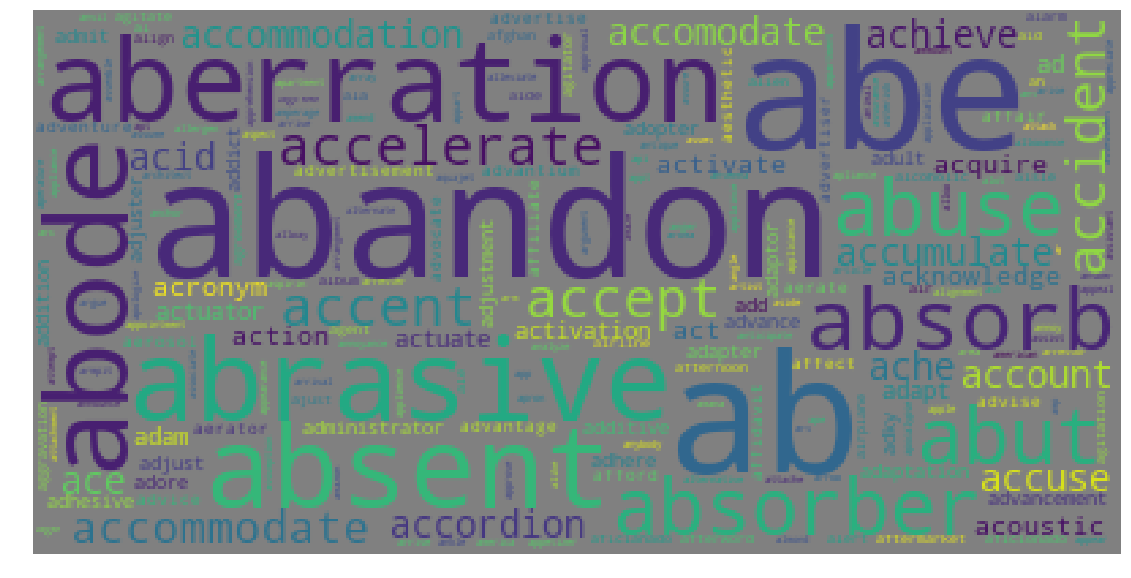

In [8]:
cloud = wordcloud.WordCloud(background_color='gray', max_font_size=60,max_words=1000,
                                relative_scaling=1).generate(' '.join(vect.get_feature_names()))
fig = plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(cloud);

# Total feature Length:
To get a sense of total no of features in the corpus after processing the corpus with bag of words representation.

In [9]:
len(vect.get_feature_names()) # Total no of features in the corpus

38110

# Sparse Matrix:
1. Its time to transform our training set into term matrix representation which is nothing but bag-of-word representtaion of the training set.
2. The result is stored in a SciPy sparse matrix, where each row corresponds to a document, and each column is a word from our training vocabulary.
The code below shows the sparse matrix of the training set with no of stored elements in it.

In [10]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<77512x38110 sparse matrix of type '<class 'numpy.int64'>'
	with 2388335 stored elements in Compressed Sparse Row format>

# Logistic Regression 
1. Bag of words representation and our labeled data is now ready and we are all set to train our model using logistic regression. 
2. Logistic regression is beleived to work well for high dimensional sparse matrix. Hence, we will train the Logistic regression classifier to predict the sentiment of the text. 

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train) # Train and fit the model using logistic regression
predictions = model.predict(vect.transform(X_test)) # Predict the labels on test set

Confusion Matrix and AUC:
Its essential to measure the performance of an algorithm. AUC abbrevated as Area Under curve is used not only used to measure the performance of an algorithm but also used to compare different cassifiers 
in order to determine which of the models predicts the classes best. Its measured as ROC curves where in true positive rates are plotted on y-axis and False positive rate on x-axis. The greater the value closer to 1, the better the model.

In [12]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, predictions) # Calculate confusion matrix and display AUC and Accuracy.
print(results)
print('AUC: ', roc_auc_score(y_test, predictions))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))

[[ 4972  1427]
 [  817 12163]]
AUC:  0.8570267082371066
Accuracy: 88.42%


In order to better understand how our model makes these predictions, we can use the coefficients for each feature (a word) to determine its weight in terms of positivity and negativity.

In [13]:
feature_names = np.array(vect.get_feature_names())  #get the smallest and highest co-efficients.
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['disappointing' 'worst' 'unacceptable' 'terrible' 'junk' 'touched'
 'disappointment' 'poorly' 'sloppy' 'disappointed']

Largest Coefs: 
['saved' 'loves' 'excellent' 'sparkling' 'perfect' 'hardest' 'beats'
 'softer' 'glitch' 'perfectly']



By looking at the 10 smallest and 10 largest coefficients, we can see the model has predicted words like 'touched' as negative and 'hardest' and 'glitch' as positive. Which means, there is room to improve.

Example to show how this model works

In [14]:
# Example to show how this model works
print(model.predict(vect.transform(['The product is not bad, but I would not buy it again'])))

[0.]


# Logistic Regression with TF-IDF weights
1. The model can be improved using TF-IDF weighting by penalizing commonly occuring words such as "the", "a" and "is". If we feed the classifier with these highly frequent common terms, the rare terms which will add more value to our sentiment will be over shadowed. Hence, we will use TF-IDF that will allow us to weight terms based on how important they are to a document.
2. To accomplish that we have intialized TF-IDF vectorizer and fit our training data. We gave min_df=5, which means we will remove any words from our vocabulary that appear in less than five documents.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# This vectorizer breaks text into single words and then calculates the TF-IDF representation.
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

14040

Fit the model and predict

In [16]:
X_train_vectorized = vect.transform(X_train) # Train and fit the training data using TF-IDF
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_vectorized, y_train)
predictions = model_tfidf.predict(vect.transform(X_test)) # Predict the labels on new set.

Confusion Matrix and AUC (Logistic regression with TF-IDF weights)

In [17]:
results = confusion_matrix(y_test, predictions) # Calculate confusion matrix and display AUC and Accuracy
print(results)
print('AUC: ', roc_auc_score(y_test, predictions))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))

[[ 5177  1222]
 [  764 12216]]
AUC:  0.8750864385349116
Accuracy: 89.75%


Using the following code, we are able to obtain a list of features with the smallest TF-IDF that either commonly appeared across all reviews or only appeared rarely in very long reviews and a list of features with the largest TF–IDF contains words which appeared frequently in a review, but did not appear commonly across all reviews. But, still these words do not make sense and hence there is a possibility to missclassify the data with False positives/False negatives.

In [18]:
feature_names = np.array(vect.get_feature_names()) # get the smallest and highest co-efficients.
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest TF-IDF: \n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest TF-IDF: \n{}\n'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest TF-IDF: 
['nitp666suc' 'spin_prod_975580612' 'spin_prod_975587312' 'assets' 'rsh1'
 'isfor' 'worldwide' 'hypothetically' 'reoccurred' 'f8']

Largest TF-IDF: 
['installed' 'noisey' 'nice' 'funny' 'est' 'bad' 'amazing' 'very'
 'filters' 'worthless']



Lets see with an example to show how this model works

In [19]:
# Example to show how this model works
print(model_tfidf.predict(vect.transform(['The product is not good, I will never buy it again','The product is good, I will buy it again'])))

[0. 1.]


# Observation:
Using Logistic regression with TF-IDF weights over just Logistic regression has improved not only improved the True positive but also the model accuaracy and AUC.

# Logistic regression with n grams
1. Logistic regression with TF-IDF does not model the data well  with the coefficients as you see above and hence there is a possibility to misclassify the prediction increasing the False positive rates.
2. We can use n-grams to improve the classification accuracy. It improves the model by taking bigrams count pairs of adjacent words and could give us better judgement over features such as 'bad' versus 'not bad'(somewhat neural sentiment). Thus, we are refitting our training set specifying a minimum document frequency of 5 and extractng 1-grams and 2-grams.

Since this is n grams model it has many features to work with as you see below.

In [20]:
# This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

147157

Fit the model and predict with n grams

In [21]:
model_ngram = LogisticRegression() # Train and fit the model using Logistic Rgression TF-IDF weights
model_ngram.fit(X_train_vectorized, y_train)
predictions = model_ngram.predict(vect.transform(X_test))

Confusion Matrix and AUC (Logistic regression with n grams)

In [22]:
results = confusion_matrix(y_test, predictions) # Calculate confusion matrix and display AUC and Accuracy
print(results)
print('AUC: ', roc_auc_score(y_test, predictions))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))

[[ 5361  1038]
 [  727 12253]]
AUC:  0.8908889546252773
Accuracy: 90.89%


Using coefficeints to check the features again with n-grams. If you observe, our predictions about coefficients with n-grams has now GREATLY improved over Logistic regression with TD-IDF.

In [23]:
feature_names = np.array(vect.get_feature_names()) # Get the smallest and highest co-efficients.
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['and simple' 'drip and' 'dishwasher br' 'destruction' 'bit taller'
 'digital readouts' 'and simply' 'charm so' 'crack at' 'and silver']

Largest Coef: 
['convinced' 'br broiler' 'are intuitive' 'customer comments' 'care for'
 'batteries are' 'about seven' 'crushes' 'back can' 'care since']



Lets see with an example to show how this model works

In [24]:
# Example to show how this model works
model_ngram.predict(vect.transform(['The product is not good, I will never buy it again','The product is good, I will buy it again']))

array([0., 1.])

# Observation:
1. The smallest and largest coefficeints have now greatly improved over just Logistic Regression and Logistic Regression with TF-IDF weights.
2. Accuarcacy and AUC also have improved.
3. True Positive counts in confusion matrix also have improved over previous models.

# Diplaying top 10 products that are most reviewed

In [25]:
products = df['star_rating'].groupby(df['product_title']).count()
print("Number of Unique Products= {}".format(products.count()))

top_products = products.sort_values(ascending=False)
print("Top 10 Reviewed Products:\n")
print(top_products[:10], end='\n\n')
print('Most Reviewed Product - has {} reviews.'.format(products.max()))
top_ten_products = top_products[:10]

Number of Unique Products= 11142
Top 10 Reviewed Products:

product_title
GE MWF SmartWater Compatible Water Filter Cartridge - Refrigerator                       1230
NewAir AI-100R 28-Pound Portable Icemaker, Red                                           1125
SPT Countertop Dishwasher                                                                1031
Koolatron Coke Personal Mini Fridge                                                      919 
Danby 0.7 cu.ft. Countertop Microwave                                                    793 
Avalon Bay Portable Ice Maker                                                            738 
Broan 412402 ADA Capable Non-Ducted Under-Cabinet Range Hood                             690 
Danby 120 Can Beverage Center, Stainless Steel DBC120BLS                                 661 
The Laundry Alternative Wonderwash Non-electric Portable Compact Mini Washing Machine    612 
Whirlpool Washer Lid Switch 3949238                                             

# Displaying our sentiment analysis of amazon appliance proudct reviews as a LIST view

In [26]:
import random
df_results = pd.DataFrame(columns=['prod_id','prod_name','n_pos','n_neg','sample_pos','sample_neg']);
positive_reviews=[];
negative_reviews=[];


for product_title, value in top_ten_products.items():
    title = df.loc[df['product_title']== product_title]
    prod_ids = df[df['product_title'] == product_title]['product_id']
    prod_id = prod_ids.iat[0]
    reviews =  df[df['product_title'] == product_title]['review_body']
    positive =0;
    negative =0;    
    negative_reviews.clear()
    positive_reviews.clear()
    for review in reviews:
        if (model_ngram.predict(vect.transform([review,review])))[0] == 0 :
            negative +=1;
            negative_reviews.append(review);
        else:
            positive +=1;
            positive_reviews.append(review);
    
    df_results = df_results.append({'prod_id' : prod_id, 'prod_name':title.iloc[0]['product_title'],'n_pos': positive, 'n_neg': negative, 'sample_pos':random.choice(positive_reviews), 'sample_neg':random.choice(negative_reviews)} , ignore_index=True)
    print('total reviews for Product {} - has {} positive reviews and has {} negative reviews.'.format(product_title,positive,negative));
df_results

total reviews for Product GE MWF SmartWater Compatible Water Filter Cartridge - Refrigerator - has 1088 positive reviews and has 142 negative reviews.
total reviews for Product NewAir AI-100R 28-Pound Portable Icemaker, Red - has 838 positive reviews and has 287 negative reviews.
total reviews for Product SPT Countertop Dishwasher - has 874 positive reviews and has 157 negative reviews.
total reviews for Product Koolatron Coke Personal Mini Fridge - has 616 positive reviews and has 303 negative reviews.
total reviews for Product Danby 0.7 cu.ft. Countertop Microwave - has 599 positive reviews and has 194 negative reviews.
total reviews for Product Avalon Bay Portable Ice Maker - has 611 positive reviews and has 127 negative reviews.
total reviews for Product Broan 412402 ADA Capable Non-Ducted Under-Cabinet Range Hood - has 622 positive reviews and has 68 negative reviews.
total reviews for Product Danby 120 Can Beverage Center, Stainless Steel DBC120BLS - has 467 positive reviews and 

,prod_id,prod_name,n_pos,n_neg,sample_pos,sample_neg
0,B00KJ07SEM,GE MWF SmartWater Compatible Water Filter Cartridge - Refrigerator,1088,142,Just what i expected for a great price.,Disgusting! Too bad I can't give zero stars!
1,B0017Y3GGI,"NewAir AI-100R 28-Pound Portable Icemaker, Red",838,287,I have just received my new ice maker and plan to use it on my boat. I have read many of the reviews and I am optimistic that it will perform as advertised. I read one review from a refrigeration person who recommended that it sit for 24 hours before plugging it in because he stated that refrigeration type products should always remain in the upright position. Low and behold it was delivered upside down and the box states to remain upright. Hopefully everything will workout just fine.,This one and all that look like it are the same ice makers by Phillips sold at Target. If you can get one year of use out of it you are lucky. My warranty replacement this weekend leaked all over the counter the first time I filled it.
2,B004MX8XO6,SPT Countertop Dishwasher,874,157,"The dishwasher is just how it was described: small and compact, but functional.<br /><br />The instructions were very unclear and caused some subsequent stress while putting everything together.<br /><br />Overall, I am satisfied with the product.",Don't ignore the bad reviews like I did. There was only a small proportion that gave this dishwasher a one star and the other reviews seemed so positive. I loath washing dishes by hand and I was thrilled with this purchase until it leaked everywhere in my kitchen and ruined items around it. We cannot find any obvious signs of leaks and it was installed properly. The water seems to come from underneath. We have tried running it empty and water just floods everywhere.
3,B000JLNBW4,Koolatron Coke Personal Mini Fridge,616,303,I bought this fridge for my boss so she could have a cold diet coke at her fingertips and not have to run to the vending machine every time she wants one. She loves it. It is really small and doesn't take up much space in her office. I definitely recommend this product.,"The unit was poor on two accounts:<br />- temperature was never 'cold' - just cool<br />- unit's cooling unit failed after three months of 24/7 use<br /><br />Looks good, but performed terribly."
4,B0052G14E8,Danby 0.7 cu.ft. Countertop Microwave,599,194,works,Item had tarnished spots on it. Not what I expected for the price. Looks very cheap.
5,B00IY7BNUW,Avalon Bay Portable Ice Maker,611,127,Thanks!,This ice maker works fine but the size of the ice itself is the disappointing problem. Very small n dilutes quickly naturally unfortunately
6,B0002YTM0I,Broan 412402 ADA Capable Non-Ducted Under-Cabinet Range Hood,622,68,Great price,"Hood had 2 dents. Wasn't worth sending back for this price...what should we expect? Still, disappointed!"
7,B002MPLYEW,"Danby 120 Can Beverage Center, Stainless Steel DBC120BLS",467,194,We received the unit 2 weeks before the promised shipping date. The size is what we wanted and looks great and will be a geat addition to our down stairs rec. room.,"We purchased this fridge to go upstairs in our bonus room - it looks very nice and was a great price so I went for it. We had it for about 3-3 1/2 weeks now, so I've had some time to &#34;test it out&#34;. We have it placed on a little wooden stand that we built for it (so it wouldn't be directly on the carpet) and made sure it had plenty of ventilation in the back as the directions recommend. We placed it in the corner of the room - probably 15-20ft away from where we sit. The fridge is loud - so much so that it disrupts our TV watching. It buzzes loudly and the fan stays on for significant periods of time. Very disappointed with the purchase - lucky for us there is still a few days to return it."
8,B002C8HR9A,The Laundry Alternative Wonderwash Non-electric Portable Compact Mini Washing Machine,477,135,"This wonder wash is so easy to crank it practically turns itself. The sea

# Results of the product reviews in a Graph

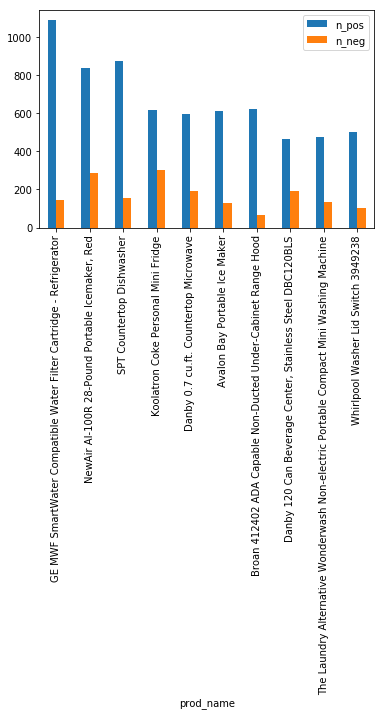

In [27]:
df_results.plot.bar(x='prod_name',rot=90) # Display results in a graph

# Multinomial Naive Bayes
1. Multionamial Navive Bayes is also believed to work well with test classification and word counts.
2. Let's delve deep into the model as its tries to learn the data and predict.
As we other models we follow the below workflow
1. Take TF-IDF weights on the training set.
2. Train and fit the model
3. Predict on the test data.
4. Calculate the performance of the model using AUC and Accuracy.

Bag of words represntation using CountVectorizer

In [28]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts 

<77512x44112 sparse matrix of type '<class 'numpy.int64'>'
	with 4055477 stored elements in Compressed Sparse Row format>

Using TF-IDF weights to penalize commonly occurring words that add little value to our model.

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

The below does the follwowing:
1. Train and fit the model multinomial Naive Bayes.
2. Predict on the test data.
3. Display confusion matrix, AUC and Accuracy.

In [30]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf,y_train) #Train and fit the model using decision tree.
X_new_counts = count_vect.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)  # Predict on the test data
results = confusion_matrix(y_test, predicted)  # Display confusion matrix, AUC and Accuracy.
print(results)
print('AUC: ', roc_auc_score(y_test, predicted))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predicted) * 100))

[[ 3660  2739]
 [  244 12736]]
AUC:  0.7765831092155916
Accuracy: 84.61%


# Decision Trees
Lets try one more model Decision tree and see which model amongst others works best. Decision tree also known to work best for categorical class labels by building tree-like model of decisions. As with other models, we will convert the text into feature vectors and use bag of words representation to train and fit the model. Evetually we will predict on the test data and calculate the performance metrics.
As we other models we follow the below workflow

1. Take TF-IDF weights on the training set.
2. Train and fit the model
3. Predict on the test data.
4. Calculate the performance of the model using AUC and Accuracy.

Bag of words representation using CountVectorizer as feature vectors.

In [31]:
# Represent text as feature vectors
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 

Using TF-IDF weights to penalize commonly occurring words that add little value to our model.

In [32]:
# This vectorizer breaks text into single words and then calculates the TF-IDF representation
tfidf_transformer = TfidfTransformer() 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

The below does the follwowing:
1. Train and fit the model using decision tree.
2. Predict on the test data.
3. Display confusion matrix, AUC and Accuracy.

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_tfidf,y_train) #Train and fit the model using decision tree.
predict = clf.predict(X_new_tfidf) # Predict the labels on the test data
results = confusion_matrix(y_test, predict) #  Calculate the accuary of the model by showing confusion matrix, AUC and Accuracy.
print(results)
print('AUC: ', roc_auc_score(y_test, predict))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predict) * 100))

[[ 4326  2073]
 [ 1960 11020]]
AUC:  0.7625207954536426
Accuracy: 79.19%


# RandomForestClassifier:
Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. 
As we other models we follow the below workflow
1. Take TF-IDF weights on the training set.
2. Train and fit the model
3. Predict on the test data.
4. Calculate the performance of the model using AUC and Accuracy.

In [34]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Bag of words representaion using feature vector and TF-IDF weights.
X_new_counts = count_vect.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

#Create a Gaussian Classifier
rclf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
rclf.fit(X_train_tfidf,y_train)

# Calculate the performance using AUC and Accuracy
predicted = rclf.predict(X_new_tfidf)
print('AUC: ', roc_auc_score(y_test, predicted))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predicted) * 100))

AUC:  0.8055667584327386
Accuracy: 85.61%


# Observation:
1. So far we have used 6 models Logistic Regression, Logistic Regression with TF-IDF, Logistic regression with n-grams, Multinomial Naive Bayes, Decision Tree and Random Forest.
2. Amongst all the models, Logistic regression with n-grams seemed to work best as it considers two words together that accounts for more meaning than a single word. Also, it accounted for highest accuracy of 90% and AUC of 0.89.

# Please check the sentiment using your own text
This is the test area where a TA can use to test the sentiment  of a text

In [35]:
import ipywidgets as widgets
from IPython.display import display
# widget to insert user data
text = widgets.Text(  
    placeholder='Type something',
    description='Input String:',
    disabled=False
)
display(text)

def handle_submit(sender):
    print(model_ngram.predict(vect.transform([text.value,]))) # Used Losgistic regression with n-grams to predict the text
    
text.on_submit(handle_submit)

Text(value='', description='Input String:', placeholder='Type something')

# Enhancement: Predict Star rating based on reviews:
 The above classifiers label the cusosmer review as positive or negative based on the sentiment in the text. In thsi particular enhacement will focus on predicting the rating based on the text entered by the user.
    

Display the review text and rating and display last 5 records.

In [36]:
df1 = df[['review_body','star_rating']] #Display the review text and rating and display last 5 records
df1.tail()

,review_body,star_rating
96886,"This is a pretty good dishwasher for the price. It does a very good job cleaning very dirty items even on the normal cleaning cycle. There is even an option to turn off the drying mode. There is very little unused space, and the space is pretty well organized.<br />If you have plates that are somewhat on the large size they might not fit very well into the dishwasher. The instructions are less than adequate and extremely poorly written. For example sink hook-ups (while pretty easy to figure out) are not even described. Someone we know had their dishwasher fail (under warrenty) because of defective electronics.<br />If you want a pretty inexpensive solution to washing your dishes in a small apartment this is a good one. If you're looking for a long term solution, a more expensive and larger standalone dishwasher may be a better option.",4
96887,I bought this for our office and was extremely dissatisfied with it. It stopped working after only 8 months of light use (storing our milk for coffee). Save yourself some grief and get a better known brand.,1
96888,When I saw this small dishwasher I thought it was a wonderful idea. I have a very small kitchen and think this would be a wonderful idea!! Kudos to the inventor.,5
96889,"Probably the best small refrigerator on the market. It has a true freezer, It will keep ice cream really frozen in it's separate freezer. The drawback is that you have to flex the door retainer to get a 2 liter bottle in the door, It will fit however. The real advantage to this model is that it is self defrosting in the refregerator section!. If they had allowed better accomodation for 2 liter bottles it would deserve a 5.",4
96890,"This is just a normal mid-sized refrigerater, but at a good price. It really doesn't do anything special. It has no special qualities, but if you want a boring old refrigerator I would recomend this recomend this product.",3


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))
 
# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(df1['review_body'].fillna(' '))

Split the data into test set and train set. We are giving a train set of 80% by setting the paramter of test_szie to 0.2

In [38]:
train_X, test_X, train_y, test_y = train_test_split(vectors, df1['star_rating'], test_size=0.2, random_state=42)

Normalizing the term frequcny counts to penalize some of the commonly used words that do not add value to our prediction.
We are using bi-grams as two words grouped together will add more meaning to prediction than a single word. 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))
 
# the 'fit' builds up the vocabulary from all the reviews
# whiletrain_X, test_X, train_y, test_y = train_test_split(vectors, df1['star_rating'], test_size=0.33, random_state=42) the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(df1['review_body'].fillna(' '))

Learn and fit the model using Linear SVC

In [40]:
from sklearn.svm import LinearSVC
 
# initialise the SVM classifier
classifier = LinearSVC()
 
# train the classifier
classifier.fit(train_X, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Predict the classifier using test data and display the first 10 predictions and actual ratings.
1. The fisrt row is the predition made by the classifier.
2. The second row corresponds to the actual rating give to the review.
3. The fifth review in our dataset classifier has predicted 5, but the actual rating is 4.
4. Out of 10, the classifier predicted 7 as correct and 3 as incorrect, as its sometimes difficult for a computer to comprehend nuetrality or ambiguity of the text. But, overall the predictions are quite close.

In [41]:
predictions = classifier.predict(test_X) # Predict the classifier using test data
print(list(predictions[:10])) # Predictions made by the model
print(list(test_y[:10])) # Actual rating of the text

[1, 5, 5, 5, 5, 5, 4, 5, 5, 5]
[1, 5, 5, 5, 4, 3, 3, 5, 5, 5]


Printing a review as an example. it rated as 1 based on the text in the customer review.

In [42]:
print(classifier.predict(vectorizer.transform(['I bought this for our office and was extremely dissatisfied with it. It stopped working after only 8 months of light use (storing our milk for coffee). Save yourself some grief and get a better known brand','This is just a normal mid-sized refrigerater, but at a good price. It really doesnt do anything special. It has no special qualities, but if you want a boring old refrigerator I would recomend this recomend this product'])))

[1 1]


Checking for the performance of the model by evaluating accuracy.

In [43]:
print(accuracy_score(test_y, predictions)) # calculate accuracy

0.7237215542597657


In [44]:
review_text = widgets.Text(
    placeholder='Type something',
    description='Input String:',
    disabled=False
)
display(review_text)

def handle_submit(sender):
    print(classifier.predict(vectorizer.transform([review_text.value,])))
    review_text.on_submit(handle_submit)

Text(value='', description='Input String:', placeholder='Type something')

References:
    http://www.developintelligence.com/blog/2017/03/predicting-yelp-star-ratings-review-text-python/
    https://datascienceplus.com/scikit-learn-for-text-analysis-of-amazon-fine-food-reviews/